<a href="https://colab.research.google.com/github/victor3813/tibame/blob/main/ML2021_06_02.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
# DataFrame: 表格. Series: 一行/一列. 
df = pd.DataFrame(iris["data"], 
                  columns=iris["feature_names"])
df["ans"] = iris["target"]
df.to_csv("iris.csv", encoding="utf-8", index=False)
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [20]:
# sklearn前: pandas.DataFrame
# sklearn後: np.array
import numpy as np
from sklearn.model_selection import train_test_split
x, y = np.array(df.drop(["ans"], axis=1)), np.array(df["ans"])
# 90% x, 10% x, 90% y, 10% y
x_train, x_test, y_train, y_test = train_test_split(x, 
                                                    y,
                                                    test_size=0.1)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(135, 4)
(15, 4)
(135,)
(15,)


In [21]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

[Text(223.2, 504.7714285714286, 'petal width (cm) <= 0.75\ngini = 0.666\nsamples = 135\nvalue = [46, 46, 43]\nclass = setosa'),
 Text(167.39999999999998, 427.11428571428576, 'gini = 0.0\nsamples = 46\nvalue = [46, 0, 0]\nclass = setosa'),
 Text(279.0, 427.11428571428576, 'petal length (cm) <= 4.85\ngini = 0.499\nsamples = 89\nvalue = [0, 46, 43]\nclass = versicolor'),
 Text(111.6, 349.4571428571429, 'petal width (cm) <= 1.65\ngini = 0.085\nsamples = 45\nvalue = [0, 43, 2]\nclass = versicolor'),
 Text(55.8, 271.8, 'gini = 0.0\nsamples = 42\nvalue = [0, 42, 0]\nclass = versicolor'),
 Text(167.39999999999998, 271.8, 'sepal width (cm) <= 3.0\ngini = 0.444\nsamples = 3\nvalue = [0, 1, 2]\nclass = virginica'),
 Text(111.6, 194.14285714285717, 'gini = 0.0\nsamples = 2\nvalue = [0, 0, 2]\nclass = virginica'),
 Text(223.2, 194.14285714285717, 'gini = 0.0\nsamples = 1\nvalue = [0, 1, 0]\nclass = versicolor'),
 Text(446.4, 349.4571428571429, 'petal width (cm) <= 1.75\ngini = 0.127\nsamples = 44\n

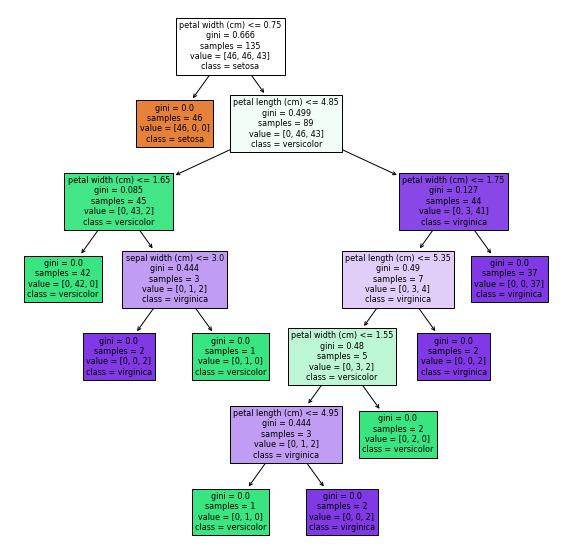

In [22]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree
plt.figure(figsize=(10, 10))
plot_tree(clf, 
          feature_names=iris["feature_names"], 
          class_names=iris["target_names"],
          filled=True)

In [23]:
from sklearn.metrics import accuracy_score
pre = clf.predict(x_test)
accuracy_score(pre,y_test)

1.0